<a href="https://colab.research.google.com/github/NileshCT/Machine_Learning_Models/blob/main/Classification_Modelling_WeatherAUSipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#importing dataset for EDA and Modelling
df=pd.read_csv("/content/drive/MyDrive/weatherAUS.csv.zip")

**Data Understanding**

In [3]:
#Exploring top five records.
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#Exploring last five records
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
#Exploring the total rows and columns.
df.shape

(145460, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#Exploring all non null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
#Exploring ststistical information of the numeric features.
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
#Exploring all nunique counts from dataframe.
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
df.drop(["Date"],axis=1,inplace=True)

In [11]:
df["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df["RainToday"].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
#Exploring duplicated count in tha dataframe and there are zero duplicates.
df.duplicated().sum()

215

In [14]:
#Exploring all numeric_features from dataframe.
numeric_feature=df.describe(include=float).columns
numeric_feature

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [15]:
#Exploring all numeric_features from dataframe.
categorical_feature=df.describe(include=object).columns
categorical_feature

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [16]:
#Creating new dataframe by cloning df dataframe.
df1=df.copy()

In [17]:
#Considering all features except the raintomorrow feature.
df1=df1.iloc[:,:-1]

In [18]:
df1.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

**Missing value treatment**

In [19]:
#Exploring the sum of all null values in df dataframe.
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [20]:
#Exploring the sum of all null values in df1 dataframe.
df1.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
dtype: int64

In [21]:
#Using ffill and bfill method togethor to treat missing values in the dataframe.
df1=df1.fillna(method="ffill",axis=0).fillna(method="bfill",axis=0)
df1


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No
1,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,No
2,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No
4,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,10.0,10.7,E,31.0,SE,ENE,...,11.0,51.0,24.0,1024.6,1020.3,8.0,7.0,10.1,22.4,No
145456,Uluru,3.6,25.3,0.0,10.0,10.7,NNW,22.0,SE,N,...,9.0,56.0,21.0,1023.5,1019.1,8.0,7.0,10.9,24.5,No
145457,Uluru,5.4,26.9,0.0,10.0,10.7,N,37.0,SE,WNW,...,9.0,53.0,24.0,1021.0,1016.8,8.0,7.0,12.5,26.1,No
145458,Uluru,7.8,27.0,0.0,10.0,10.7,SE,28.0,SSE,N,...,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No


In [22]:
#Exploring random samples from dataframe.
df1.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
54523,MountGinini,8.4,20.0,0.0,1.6,2.8,NW,72.0,WNW,WNW,...,17.0,39.0,31.0,1018.5,1016.0,8.0,8.0,12.5,18.8,No
88766,Cairns,22.3,28.8,0.0,7.0,10.0,SE,28.0,S,ENE,...,17.0,76.0,57.0,1012.5,1008.9,5.0,1.0,24.6,28.0,No
101303,MountGambier,8.5,32.0,0.0,6.0,11.3,SW,37.0,E,SW,...,19.0,53.0,25.0,1019.1,1013.5,1.0,6.0,17.8,30.7,No
121581,Perth,23.7,37.6,7.8,8.4,11.9,WNW,52.0,NNE,WNW,...,24.0,64.0,66.0,1008.4,1006.4,5.0,3.0,28.4,29.0,Yes
132668,Hobart,7.9,15.9,0.0,1.6,3.5,NW,56.0,NW,NNW,...,13.0,70.0,55.0,1012.9,1013.4,7.0,5.0,12.1,15.2,No
83332,Dartmoor,11.2,17.2,0.6,5.0,3.1,N,56.0,N,N,...,17.0,100.0,56.0,1012.9,1007.8,7.0,7.0,12.9,15.8,No
80839,Watsonia,14.6,21.8,0.2,11.2,10.3,SW,44.0,WSW,SW,...,22.0,65.0,43.0,1013.3,1015.0,7.0,2.0,16.9,20.7,No
103944,Nuriootpa,5.8,26.4,0.0,9.6,13.2,ESE,33.0,E,ESE,...,13.0,51.0,17.0,1020.9,1017.8,2.0,3.0,14.3,24.8,No
91874,GoldCoast,12.9,22.3,0.0,13.6,8.1,WSW,37.0,WNW,WSW,...,17.0,46.0,19.0,1013.2,1010.4,4.0,2.0,18.7,21.6,No
99745,MountGambier,8.3,15.9,0.0,1.8,3.4,W,67.0,NNW,NNW,...,20.0,50.0,62.0,1007.0,1003.6,7.0,6.0,11.7,15.8,No


In [23]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No
1,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,No
2,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No
4,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


**Data Cleaning process**

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [25]:
#Q1 and Q2 values and IQR results
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR=Q3-Q1


In [26]:
df1= df1[~((df1 < (Q1 - 12* IQR)) |(df1 > (Q3 + 12* IQR))).any(axis=1)]
df1.shape

<ipython-input-26-b732aae89a50>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1= df1[~((df1 < (Q1 - 12* IQR)) |(df1 > (Q3 + 12* IQR))).any(axis=1)]


(136184, 21)

In [27]:
df1.describe(include=object).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [28]:
#Lebal encoding process
from sklearn import preprocessing
L_Encoder=preprocessing.LabelEncoder()


In [29]:
df1["Location"]=L_Encoder.fit_transform(df1["Location"])

<ipython-input-29-16cb5482e890>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Location"]=L_Encoder.fit_transform(df1["Location"])


In [30]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No
1,2,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,No
2,2,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No
3,2,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No
4,2,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df1["WindGustDir"]=L_Encoder.fit_transform(df1["WindGustDir"])

In [33]:
df1["WindGustDir"].unique()

array([13, 14, 15,  4,  6,  3,  5, 12,  1, 10,  8,  7,  9,  2,  0, 11])

In [40]:
df1["WindDir9am"]=L_Encoder.fit_transform(df1["WindDir9am"])

In [41]:
df1["WindDir9am"].unique()

array([13,  6,  9,  1, 12, 10,  8,  4, 11,  2,  0,  3,  7, 15, 14,  5])

In [35]:
df1["WindDir3pm"]=L_Encoder.fit_transform(df1["WindDir3pm"])

In [36]:
df1["WindDir3pm"].unique()

array([14, 15,  0,  7, 13, 10,  2,  1, 11,  6,  9,  3, 12,  8,  5,  4])

In [37]:
df1["RainToday"]=L_Encoder.fit_transform(df1["RainToday"])

In [38]:
df1["RainToday"].unique()

array([0, 1])

In [42]:
# import module
from sklearn.preprocessing import StandardScaler
# compute required values
scaler =StandardScaler()
model = scaler.fit(df1)
scaled_data = model.transform(df1)
print(scaled_data)

[[-1.52928959  0.20789835 -0.06565094 ... -0.01165149 -0.00500346
  -0.45650593]
 [-1.52928959 -0.7290946   0.24323218 ...  0.03428658  0.35435714
  -0.45650593]
 [-1.52928959  0.1298156   0.32747303 ...  0.61616885  0.19623848
  -0.45650593]
 ...
 [ 1.21114456 -1.04142558  0.49595473 ... -0.68540991  0.61309676
  -0.45650593]
 [ 1.21114456 -0.6666284   0.50999487 ... -0.28727994  0.59872234
  -0.45650593]
 [ 1.21114456  0.44214658  0.50999487 ... -0.30259263 -0.13437327
  -0.45650593]]


<function matplotlib.pyplot.show(close=None, block=None)>

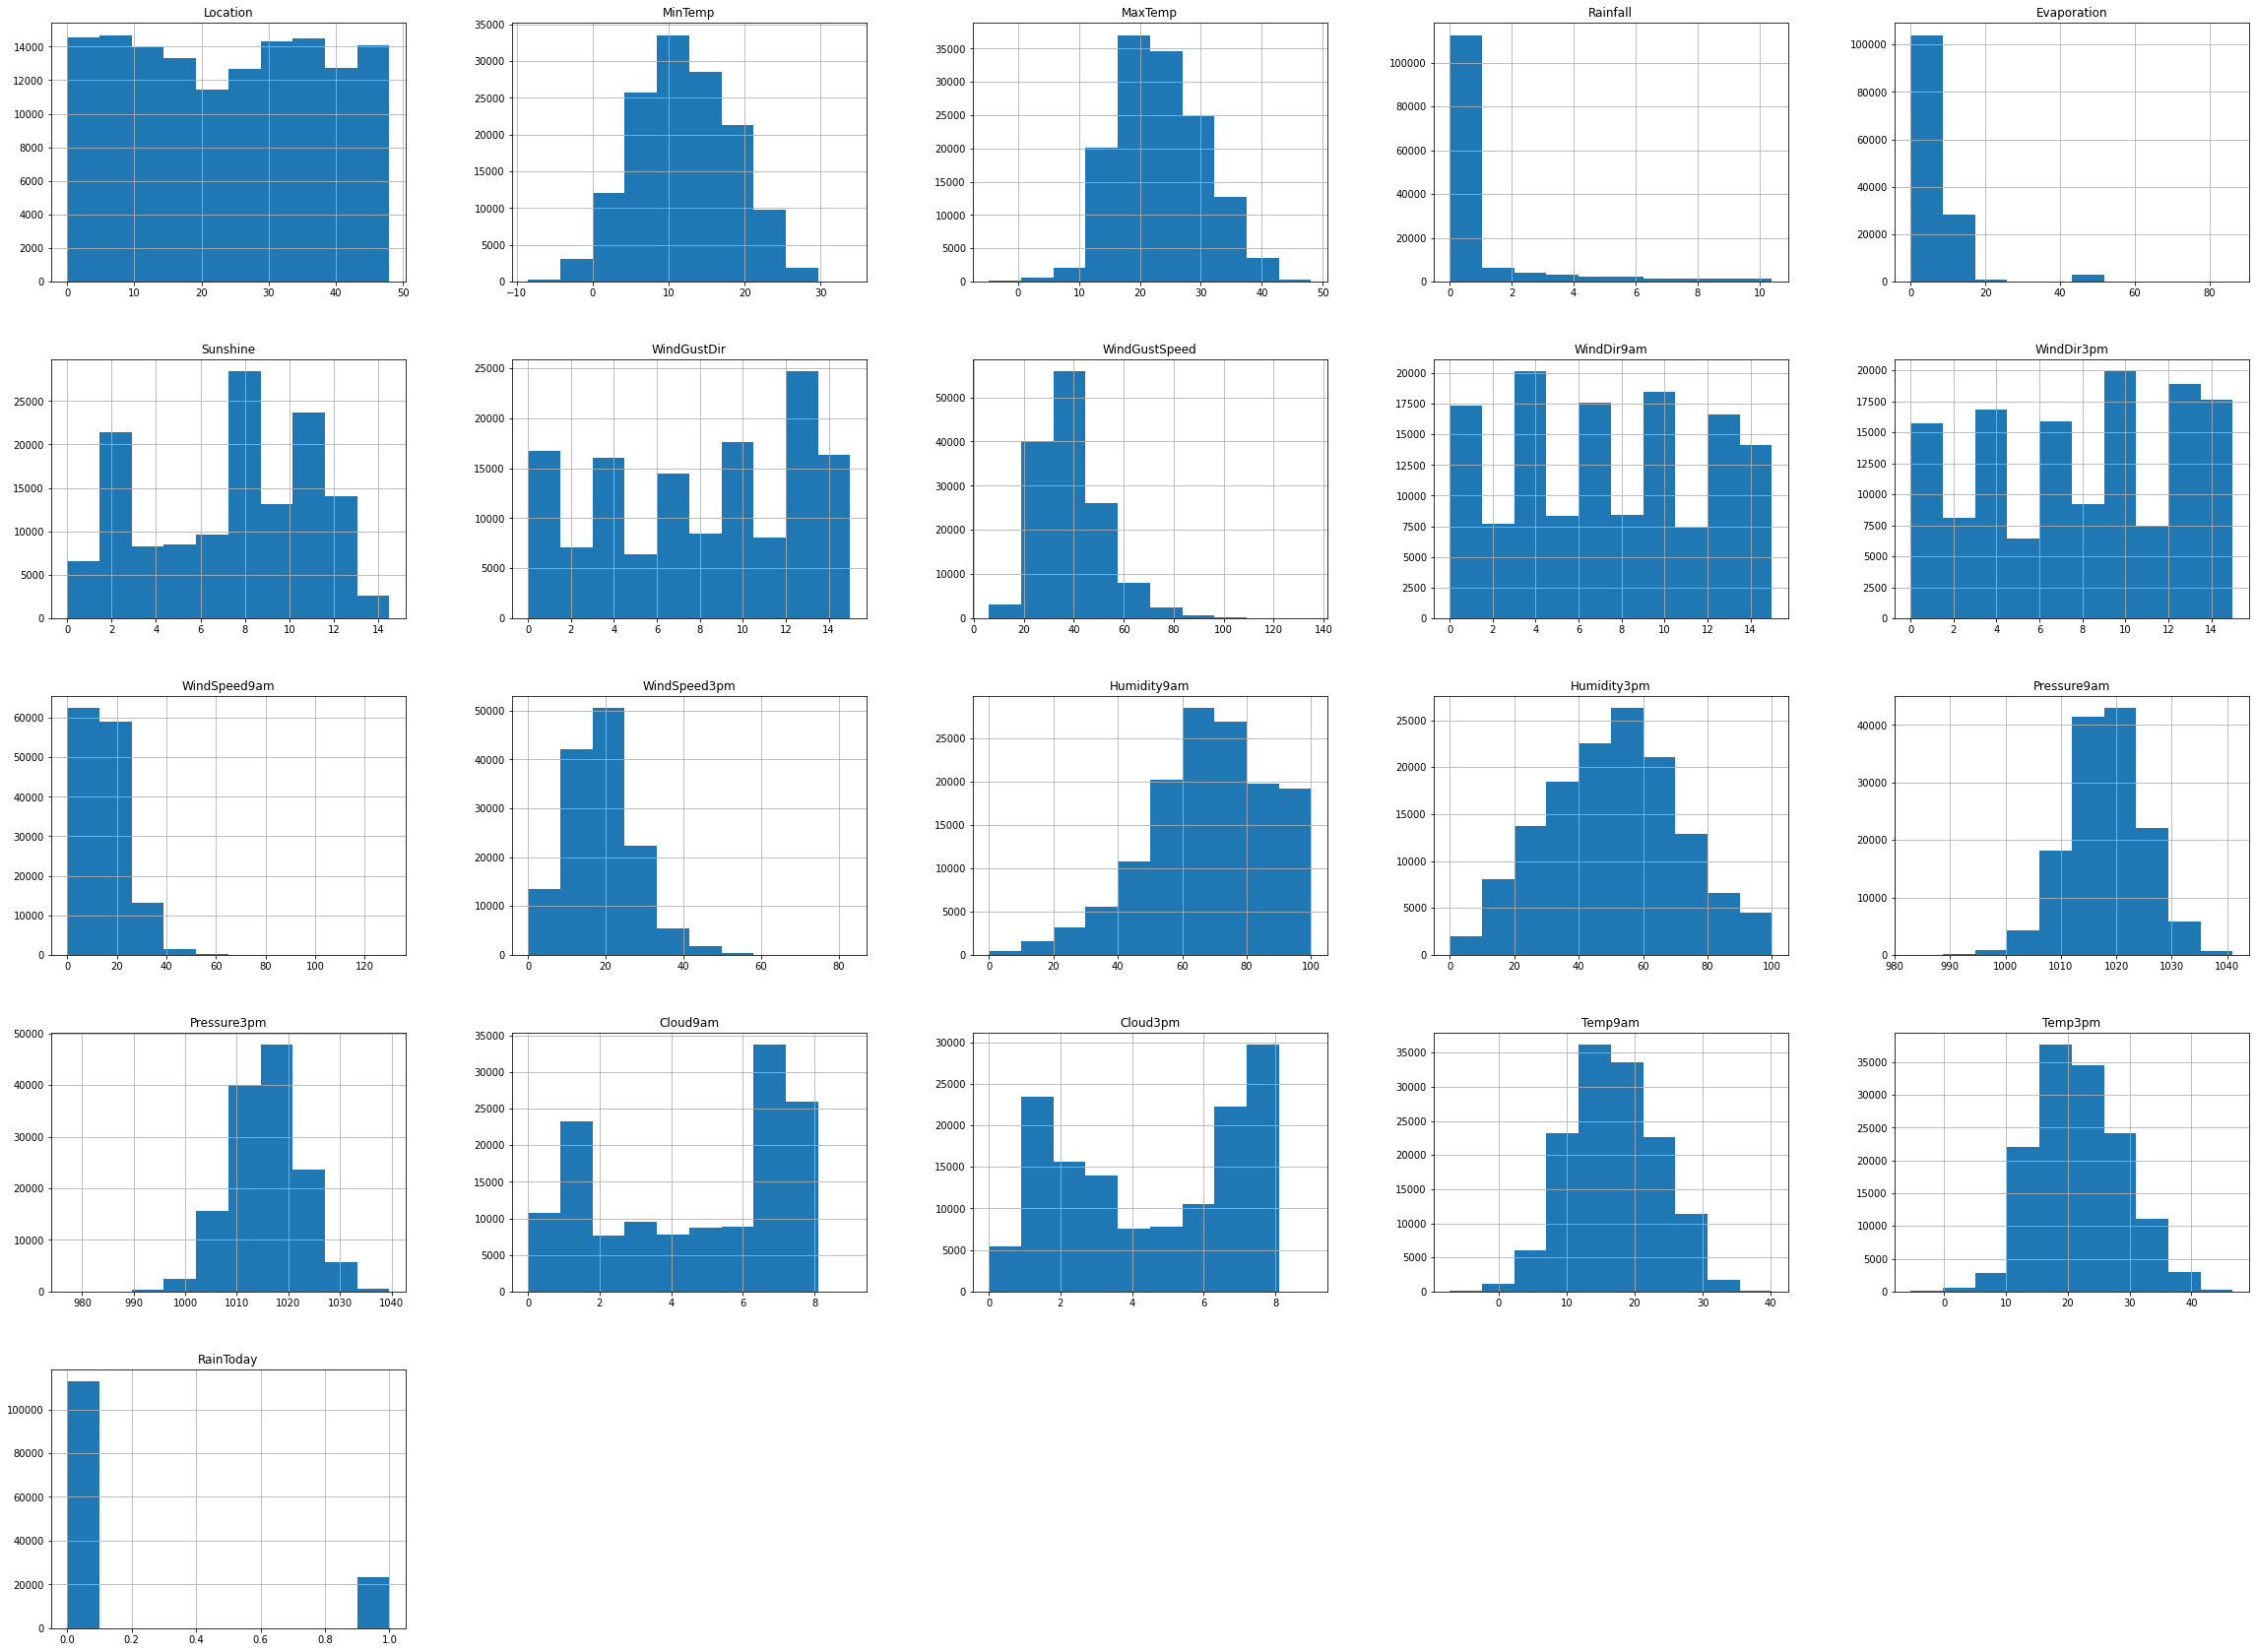

In [43]:
#Exploring data after use of StandardScaler
# plt.figure(figsize=(40,30))
df1.hist(figsize=(40,30))
plt.show


In [44]:
df["RainTomorrow"].shape

(145460,)

In [47]:
df["RainTomorrow"].notnull().sum()

142193

In [58]:
# nil=df.tail(3266)

In [59]:
# nil

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142194,Darwin,25.7,32.2,0.0,4.6,4.7,SSE,30.0,NE,N,...,82.0,96.0,1008.6,1006.3,7.0,8.0,28.9,24.4,No,Yes
142195,Darwin,23.8,32.0,32.6,4.8,4.1,ESE,33.0,ENE,S,...,86.0,91.0,1009.5,1007.2,7.0,7.0,27.9,27.3,Yes,Yes
142196,Darwin,25.7,32.4,8.4,3.4,5.7,NNW,22.0,SSE,WNW,...,90.0,58.0,1010.9,1006.9,7.0,7.0,27.3,32.0,Yes,No
142197,Darwin,25.6,32.4,0.0,3.0,9.4,WNW,35.0,W,WNW,...,79.0,70.0,1010.4,1007.2,7.0,7.0,28.9,31.2,No,Yes
142198,Darwin,24.3,32.8,3.6,3.8,5.5,NW,28.0,SW,WNW,...,81.0,62.0,1009.7,1006.2,7.0,8.0,28.1,32.6,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [55]:
# y=nil["RainTomorrow"]

142194    Yes
142195    Yes
142196     No
142197    Yes
142198     No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 3266, dtype: object

In [57]:
# df1.shape

(136184, 21)

In [118]:
# a=[(i,index) for i,index in enumerate(df["RainTomorrow"]) if pd.isna(index)]
# result = pd.DataFrame(a).set_index(0)

In [123]:
# df.loc[14]

Location         Albury
MinTemp             8.4
MaxTemp            24.6
Rainfall            0.0
Evaporation         NaN
Sunshine            NaN
WindGustDir         NaN
WindGustSpeed       NaN
WindDir9am            S
WindDir3pm          WNW
WindSpeed9am        4.0
WindSpeed3pm       30.0
Humidity9am        57.0
Humidity3pm        32.0
Pressure9am      1009.7
Pressure3pm      1008.7
Cloud9am            NaN
Cloud3pm            NaN
Temp9am            15.9
Temp3pm            23.5
RainToday            No
RainTomorrow        NaN
Name: 14, dtype: object

In [127]:
a = []
for index in enumerate(["RainTomorrow"]):
     if pd.isna(index):
       a.append(index)

In [89]:
#Exploring top five records of raintomorrow feature with nan values.
t=pd.DataFrame(a).set_index(0)
t.head()

,1
0,
14,NaN
283,NaN
435,NaN
437,NaN
443,NaN


In [197]:
#Convering the index which having nan values in the target variable.Converting this index in list.
index_nan=t.index.tolist()
index_nan

[14,
 283,
 435,
 437,
 443,
 452,
 455,
 464,
 611,
 983,
 984,
 985,
 986,
 1013,
 1374,
 1529,
 1530,
 1531,
 1685,
 1922,
 2031,
 2032,
 2033,
 2042,
 2913,
 2934,
 2942,
 2943,
 2944,
 3201,
 3211,
 3316,
 3338,
 3339,
 3384,
 3411,
 3412,
 3428,
 3433,
 3438,
 3446,
 3447,
 3452,
 3457,
 3462,
 3471,
 3472,
 3482,
 3517,
 3524,
 3525,
 3526,
 3529,
 3530,
 3532,
 3539,
 3542,
 3549,
 3552,
 3576,
 3584,
 3595,
 3629,
 3634,
 3639,
 3692,
 3760,
 3955,
 4044,
 4050,
 4131,
 4344,
 4345,
 4629,
 4644,
 4656,
 4845,
 4900,
 4911,
 4912,
 4935,
 4938,
 4939,
 5056,
 5079,
 5149,
 5393,
 5458,
 5459,
 5460,
 5461,
 5462,
 5841,
 5842,
 5843,
 5844,
 5845,
 5846,
 5847,
 5848,
 5849,
 5850,
 5851,
 5852,
 5853,
 5854,
 5855,
 5856,
 5857,
 5876,
 6294,
 6968,
 6969,
 6970,
 7446,
 7447,
 8529,
 8530,
 8588,
 8838,
 8839,
 8840,
 8841,
 8842,
 8843,
 8847,
 8848,
 8849,
 8904,
 8905,
 8906,
 9147,
 10238,
 10448,
 10534,
 10816,
 10820,
 10821,
 10822,
 10920,
 10921,
 10922,
 10923,
 1

In [167]:
# for i in index_nan:
#   nn=df1.iloc[i]
#   print(nn)
#   break

Location            2.0
MinTemp             9.8
MaxTemp            27.7
Rainfall            0.0
Evaporation        12.0
Sunshine           12.3
WindGustDir        14.0
WindGustSpeed      50.0
WindDir9am          8.0
WindDir3pm         14.0
WindSpeed9am        4.0
WindSpeed3pm       22.0
Humidity9am        50.0
Humidity3pm        28.0
Pressure9am      1013.4
Pressure3pm      1010.3
Cloud9am            0.0
Cloud3pm            7.0
Temp9am            17.3
Temp3pm            26.2
RainToday           0.0
Name: 15, dtype: float64


In [199]:
#Extracting only infercial data from dataframe.
df.iloc[index_nan]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


In [180]:
# #Took reference from it for extract required rows to differenciate inferential data and known data.
# a=[12,13,15,17,16]
# b=[]
# c=[]
# for i in a:
#   if df["RainTomorrow"]
#     if i not in b:
#       b.append(i)
#   else:
#       c.append(i)
# print(b)
# print(c)


[12, 16]
[13, 15, 17]


In [210]:
#Creating list of all non null values in the target variable for spliting in train and test data.
a=[]
for i in range(df.shape[0]):
  if i not in index_nan:
    a.append(i)


In [211]:
len(a)

142193

In [212]:
df.iloc[a]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [209]:
len(index_nan)

3267